In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline
plt.style.use('seaborn')
import os
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
BASE_DIR = '/content/drive/My Drive/4th Year/CS 197 (Thesis)/FINAL - COVID Modeling/notebooks/data/'

# Helper Functions

In [4]:
# All countries
def get_graphs(df, cluster_num=0, last_columns=71):
  fig=plt.figure(figsize=(50,20))
  ax=fig.add_axes([0,0,1,1])
  ax.set_xlabel("Dates")
  ax.set_ylabel("Cases")

  df_cluster = df[df['labels'] == cluster_num]
  for idx, area in df_cluster.iterrows():
    x = area.index[6:-last_columns]
    y = [area[i] for i in x]
    
    ax.plot(x,y,label=area['Country/Region'])
    #comment out the line below to remove the labels of the area names.
    ax.legend()

In [5]:
# Single country / Multiple countries
def get_graph(df, country='Philippines', index=None, startc=7, endc=None):
  try:
    if index:
      df_country = df.loc[index]
    else:
      if isinstance(country, str):
        df_country = df[df['Country/Region'] == country]
      else:
        df_country = df[df['Country/Region'].isin(country)]
  
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    fig.suptitle(df_country['area'].values[0], fontsize=16)
    ax.set_xlabel("Dates")
    ax.set_ylabel("Cases")
    ax.get_xaxis().set_ticks([])
    # ax.get_yaxis().set_ticks([])

    if endc:
      x = df_country.columns[startc:-endc]
    else:
      x = df_country.columns[startc:]
    y = df_country[x]

    for idx, row in y.iterrows():
      ax.plot(x, row)

    fig.legend(df_country['area'])

    # ax.plot(x,y)
  except IndexError:
    # No South Korea in the dataset
    print("Country is not in the dataset")

In [6]:
def move_last_cols_to_first(df, num_cols, start_col=7):
  columns = list(df.columns)
  columns = columns[:start_col] + columns[-num_cols:] + columns[start_col:-num_cols]
  df = df[columns]
  return df

# Get the Total Cases

In [7]:
df_orig_confirmed = pd.read_csv(os.path.join(BASE_DIR, 'time_series_covid19_confirmed_global_populations.csv'), index_col=0)
df_orig_deaths = pd.read_csv(os.path.join(BASE_DIR, 'time_series_covid19_deaths_global.csv'))
df_orig_recovered = pd.read_csv(os.path.join(BASE_DIR, 'time_series_covid19_recovered_global.csv'))

In [8]:
def get_total(df):
  df['total_cases'] = df.iloc[:, -1]
  df['Province/State'] = df['Province/State'].fillna('no province')
  df['area'] = df['Province/State'] + ' ' + df['Country/Region']
  columns = list(df.columns)
  columns = columns[:4] + columns[-2:] + columns[4:-2]
  df = df[columns]
  return df

In [9]:
df_orig_confirmed = get_total(df_orig_confirmed)
df_orig_deaths = get_total(df_orig_deaths)
df_orig_recovered = get_total(df_orig_recovered)

df_orig_confirmed.head()

,Province/State,Country/Region,Lat,Long,total_cases,area,populations,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,...,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20
0,no province,Afghanistan,33.93911,67.709953,43628,no province Afghanistan,38928346.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240,43403,43628
1,no province,Albania,41.15330,20.168300,29126,no province Albania,2877797.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830,28432,29126
2,no province,Algeria,28.03390,1.659600,69591,no province Algeria,43851044.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679,68589,69591
3,no province,Andorra,42.50630,1.521800,5951,no province Andorra,77265.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872,5914,5951
4,no province,Angola,-11.20270,17.873900,13818,no province Angola,32866272.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451,13615,13818


# Daily Cases

In [10]:
def get_daily(df, start_col=8):
  daily = df.copy()
  columns = df.columns

  for i in range(start_col, len(columns)):
      daily_col = df[columns[i]] - df[columns[i-1]]
      daily[columns[i]]=daily_col

  return daily

In [11]:
df_daily_confirmed = get_daily(df_orig_confirmed)
df_daily_deaths = get_daily(df_orig_deaths)
df_daily_recovered = get_daily(df_orig_recovered)

df_daily_confirmed.head()

,Province/State,Country/Region,Lat,Long,total_cases,area,populations,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,...,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20
0,no province,Afghanistan,33.93911,67.709953,43628,no province Afghanistan,38928346.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,77,10,96,71,58,66,32,47,68,59,87,70,153,116,61,81,65,104,95,113,123,66,91,76,132,95,86,121,40,58,59,205,166,146,186,174,66,205,163,225
1,no province,Albania,41.15330,20.168300,29126,no province Albania,2877797.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,167,165,168,171,182,203,257,289,273,281,295,301,297,302,306,302,299,288,284,311,275,319,241,327,321,381,396,421,489,495,501,525,563,507,410,490,532,597,602,694
2,no province,Algeria,28.03390,1.659600,69591,no province Algeria,43851044.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,146,136,132,253,74,185,193,221,205,199,214,213,252,276,273,250,263,276,287,320,306,319,291,330,302,405,548,642,631,581,670,642,753,811,851,867,844,860,910,1002
3,no province,Andorra,42.50630,1.521800,5951,no province Andorra,77265.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,128,0,0,299,0,195,0,187,0,0,246,0,188,0,227,0,0,287,85,107,50,98,91,69,63,22,135,90,0,184,64,54,40,90,49,109,0,147,42,37
4,no province,Angola,-11.20270,17.873900,13818,no province Angola,32866272.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,73,215,120,122,192,166,250,126,240,160,207,220,289,244,247,197,355,263,227,203,195,289,247,230,193,349,236,289,121,112,98,247,136,137,100,175,146,77,164,203


In [14]:
df_daily_confirmed_log = df_daily_confirmed.copy()
df_daily_confirmed_log.iloc[:, 7:] = df_daily_confirmed_log.iloc[:, 7:].apply(np.log)
df_daily_confirmed_log.head()

,Province/State,Country/Region,Lat,Long,total_cases,area,populations,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,...,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20
0,no province,Afghanistan,33.93911,67.709953,43628,no province Afghanistan,38928346.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,4.343805,2.302585,4.564348,4.262680,4.060443,4.189655,3.465736,3.850148,4.219508,4.077537,4.465908,4.248495,5.030438,4.753590,4.110874,4.394449,4.174387,4.644391,4.553877,4.727388,4.812184,4.189655,4.510860,4.330733,4.882802,4.553877,4.454347,4.795791,3.688879,4.060443,4.077537,5.323010,5.111988,4.983607,5.225747,5.159055,4.189655,5.323010,5.093750,5.416100
1,no province,Albania,41.15330,20.168300,29126,no province Albania,2877797.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,5.117994,5.105945,5.123964,5.141664,5.204007,5.313206,5.549076,5.666427,5.609472,5.638355,5.686975,5.707110,5.693732,5.710427,5.723585,5.710427,5.700444,5.662960,5.648974,5.739793,5.616771,5.765191,5.484797,5.789960,5.771441,5.942799,5.981414,6.042633,6.192362,6.204558,6.216606,6.263398,6.333280,6.228511,6.016157,6.194405,6.276643,6.391917,6.400257,6.542472
2,no province,Algeria,28.03390,1.659600,69591,no province Algeria,43851044.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,4.983607,4.912655,4.882802,5.533389,4.304065,5.220356,5.262690,5.398163,5.323010,5.293305,5.365976,5.361292,5.529429,5.620401,5.609472,5.521461,5.572154,5.620401,5.659482,5.768321,5.723585,5.765191,5.673323,5.799093,5.710427,6.003887,6.306275,6.464588,6.447306,6.364751,6.507278,6.464588,6.624065,6.698268,6.746412,6.765039,6.738152,6.756932,6.813445,6.909753
3,no province,Andorra,42.50630,1.521800,5951,no province Andorra,77265.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,4.852030,-inf,-inf,5.700444,-inf,5.273000,-inf,5.231109,-inf,-inf,5.505332,-inf,5.236442,-inf,5.424950,-inf,-inf,5.659482,4.442651,4.672829,3.912023,4.584967,4.510860,4.234107,4.143135,3.091042,4.905275,4.499810,-inf,5.214936,4.158883,3.988984,3.688879,4.499810,3.891820,4.691348,-inf,4.990433,3.737670,3.610918
4,no province,Angola,-11.20270,17.873900,13818,no province Angola,32866272.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,4.290459,5.370638,4.787492,4.804021,5.257495,5.111988,5.521461,4.836282,5.480639,5.075174,5.332719,5.393628,5.666427,5.497168,5.509388,5.283204,5.872118,5.572154,5.424950,5.313206,5.273000,5.666427,5.509388,5.438079,5.262690,5.855072,5.463832,5.666427,4.795791,4.718499,4.584967,5.509388,4.912655,4.919981,4.605170,5.164786,4.983607,4.343805,5.099866,5.313206


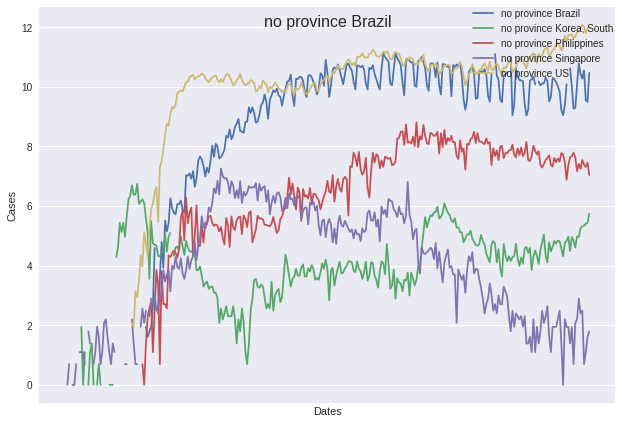

In [25]:
get_graph(df_daily_confirmed_log, country=['Brazil', 'US', 'Philippines', 'Singapore', 'Korea, South'], startc=7)

## Checking Peaks

In [ ]:
dates_cols = df_daily_confirmed.columns[7:]
df_daily_confirmed['peak_cases'] = df_daily_confirmed[dates_cols].max(axis=1)
df_daily_confirmed['normalized_peak'] = df_daily_confirmed['peak_cases'] / df_daily_confirmed['populations']
df_daily_confirmed = move_last_cols_to_first(df_daily_confirmed, 2)
df_daily_confirmed.head()

,Province/State,Country/Region,Lat,Long,total_cases,area,populations,peak_cases,normalized_peak,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,...,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20
0,no province,Afghanistan,33.93911,67.709953,43628,no province Afghanistan,38928346.0,915.0,0.000024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,77,10,96,71,58,66,32,47,68,59,87,70,153,116,61,81,65,104,95,113,123,66,91,76,132,95,86,121,40,58,59,205,166,146,186,174,66,205,163,225
1,no province,Albania,41.15330,20.168300,29126,no province Albania,2877797.0,694.0,0.000241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,167,165,168,171,182,203,257,289,273,281,295,301,297,302,306,302,299,288,284,311,275,319,241,327,321,381,396,421,489,495,501,525,563,507,410,490,532,597,602,694
2,no province,Algeria,28.03390,1.659600,69591,no province Algeria,43851044.0,1002.0,0.000023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,146,136,132,253,74,185,193,221,205,199,214,213,252,276,273,250,263,276,287,320,306,319,291,330,302,405,548,642,631,581,670,642,753,811,851,867,844,860,910,1002
3,no province,Andorra,42.50630,1.521800,5951,no province Andorra,77265.0,299.0,0.003870,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,128,0,0,299,0,195,0,187,0,0,246,0,188,0,227,0,0,287,85,107,50,98,91,69,63,22,135,90,0,184,64,54,40,90,49,109,0,147,42,37
4,no province,Angola,-11.20270,17.873900,13818,no province Angola,32866272.0,355.0,0.000011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,73,215,120,122,192,166,250,126,240,160,207,220,289,244,247,197,355,263,227,203,195,289,247,230,193,349,236,289,121,112,98,247,136,137,100,175,146,77,164,203


In [ ]:
df_daily_confirmed[df_daily_confirmed['Country/Region'] == 'Singapore']

,Province/State,Country/Region,Lat,Long,total_cases,area,populations,peak_cases,normalized_peak,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,...,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20
221,no province,Singapore,1.2833,103.8333,58130,no province Singapore,5459642.0,1426.0,0.000261,0,1,2,0,1,1,2,0,3,3,3,2,0,6,4,0,2,3,7,5,2,3,8,9,5,3,2,4,3,0,1,...,10,7,10,4,4,5,3,9,3,7,4,6,12,8,10,14,5,3,7,7,7,9,12,4,1,9,7,7,4,7,2,8,9,18,11,12,2,3,5,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccddcd5a20>]],
      dtype=object)

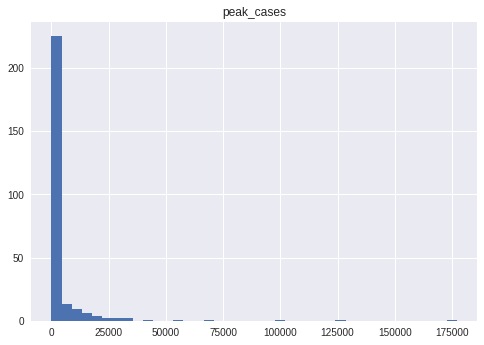

In [ ]:
# sns.swarmplot(x=df_daily_confirmed['normalized_peak'])
df_daily_confirmed.hist(column='peak_cases', bins=40)

## Saving Outliers as CSV

In [ ]:
df_outliers = df_daily_confirmed[df_daily_confirmed['peak_cases'] < 500]
df_outliers.head()

,Province/State,Country/Region,Lat,Long,total_cases,area,populations,peak_cases,normalized_peak,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,...,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20
3,no province,Andorra,42.5063,1.5218,5951,no province Andorra,77265.0,299.0,0.003870,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,128,0,0,299,0,195,0,187,0,0,246,0,188,0,227,0,0,287,85,107,50,98,91,69,63,22,135,90,0,184,64,54,40,90,49,109,0,147,42,37
4,no province,Angola,-11.2027,17.8739,13818,no province Angola,32866272.0,355.0,0.000011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,73,215,120,122,192,166,250,126,240,160,207,220,289,244,247,197,355,263,227,203,195,289,247,230,193,349,236,289,121,112,98,247,136,137,100,175,146,77,164,203
5,no province,Antigua and Barbuda,17.0608,-61.7964,134,no province Antigua and Barbuda,97929.0,39.0,0.000398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,7,0,0,0,3,0,0,2,0,0,0,0,0,3,1,0,0,0,2,0,0,1,0,0,0,0,0,2,1,0,0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,115,Australian Capital Territory Australia,429834.0,14.0,0.000033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,New South Wales,Australia,-33.8688,151.2093,4509,New South Wales Australia,8158000.0,241.0,0.000030,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,5,6,11,15,11,5,7,5,4,5,10,6,7,5,7,4,12,8,5,6,4,4,7,3,8,2,9,5,3,7,0,0,0,0,0,17,12,4,7


In [ ]:
df_outliers['area'].values.tolist()

['no province Andorra',
 'no province Angola',
 'no province Antigua and Barbuda',
 'Australian Capital Territory Australia',
 'New South Wales Australia',
 'Northern Territory Australia',
 'Queensland Australia',
 'South Australia Australia',
 'Tasmania Australia',
 'Western Australia Australia',
 'no province Bahamas',
 'no province Barbados',
 'no province Belize',
 'no province Benin',
 'no province Bhutan',
 'no province Brunei',
 'no province Burkina Faso',
 'no province Burundi',
 'no province Cabo Verde',
 'no province Cambodia',
 'Diamond Princess Canada',
 'Grand Princess Canada',
 'Manitoba Canada',
 'New Brunswick Canada',
 'Newfoundland and Labrador Canada',
 'Northwest Territories Canada',
 'Nova Scotia Canada',
 'Prince Edward Island Canada',
 'Saskatchewan Canada',
 'Yukon Canada',
 'no province Central African Republic',
 'no province Chad',
 'Anhui China',
 'Beijing China',
 'Chongqing China',
 'Fujian China',
 'Gansu China',
 'Guangdong China',
 'Guangxi China',
 'Gu

In [ ]:
df_outliers.to_csv(os.path.join(BASE_DIR, 'outlier_countries.csv'))

# Checking the Normalized Data and Shifts

In [ ]:
df_clustered = pd.read_csv(os.path.join(BASE_DIR, 'new_clustered_countries.csv'), index_col=0)
df_clustered.head()

,Province/State,Country/Region,Lat,Long,populations,area,1/22/20_confirmed,1/23/20_confirmed,1/24/20_confirmed,1/25/20_confirmed,1/26/20_confirmed,1/27/20_confirmed,1/28/20_confirmed,1/29/20_confirmed,1/30/20_confirmed,1/31/20_confirmed,2/1/20_confirmed,2/2/20_confirmed,2/3/20_confirmed,2/4/20_confirmed,2/5/20_confirmed,2/6/20_confirmed,2/7/20_confirmed,2/8/20_confirmed,2/9/20_confirmed,2/10/20_confirmed,2/11/20_confirmed,2/12/20_confirmed,2/13/20_confirmed,2/14/20_confirmed,2/15/20_confirmed,2/16/20_confirmed,2/17/20_confirmed,2/18/20_confirmed,2/19/20_confirmed,2/20/20_confirmed,2/21/20_confirmed,2/22/20_confirmed,2/23/20_confirmed,2/24/20_confirmed,...,shift 31,shift 32,shift 33,shift 34,shift 35,shift 36,shift 37,shift 38,shift 39,shift 40,shift 41,shift 42,shift 43,shift 44,shift 45,shift 46,shift 47,shift 48,shift 49,shift 50,shift 51,shift 52,shift 53,shift 54,shift 55,shift 56,shift 57,shift 58,shift 59,shift 60,shift 61,shift 62,shift 63,shift 64,shift 65,shift 66,shift 67,shift 68,shift 69,labels
0,no province,Antigua and Barbuda,17.0608,-61.7964,97929,no province Antigua and Barbuda,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.486912e-07,8.921474e-07,3.122516e-06,0.000008,0.000019,0.000037,0.000068,0.000114,0.000179,0.000263,0.000368,0.000489,0.000622,0.000761,0.000901,0.001040,0.001182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.9,1.0,1.0,0.5,0.7,0.9,1.0,0.5,0.9,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,3
1,no province,Argentina,-38.4161,-63.6167,45195774,no province Argentina,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.221802e-10,1.933081e-09,6.765784e-09,1.836427e-08,4.446087e-08,1.005202e-07,2.132833e-07,4.243113e-07,7.938520e-07,0.000001,2.355459e-06,3.774019e-06,5.789578e-06,0.000009,0.000012,0.000017,0.000022,0.000029,0.000038,0.000047,0.000059,0.000073,0.000090,0.000111,0.000138,0.000171,0.000214,...,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.2,0.0,0.0,0.1,0.9,1.0,0.5,0.9,0.5,0.7,0.9,1.0,0.5,0.7,0.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,0
2,no province,Armenia,40.0691,45.0382,2963243,no province Armenia,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.913935e-09,2.948361e-08,1.031926e-07,2.751804e-07,6.191558e-07,1.233398e-06,2.240754e-06,3.764074e-06,5.901636e-06,8.702579e-06,1.214233e-05,0.000016,2.045671e-05,2.505124e-05,2.997992e-05,0.000036,0.000044,0.000058,0.000081,0.000121,0.000187,0.000291,0.000444,0.000660,0.000952,0.001330,0.001798,0.002359,0.003006,...,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.7,0.9,1.0,1.0,1.0,0.5,0.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,0
3,Australian Capital Territory,Australia,-35.4735,149.0124,429834,Australian Capital Territory Australia,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,3.387630e-08,2.032578e-07,7.114022e-07,0.000002,0.000004,0.000009,0.000018,0.000031,0.000052,0.000084,0.000131,0.000200,0.000301,0.000449,0.000663,0.000967,0.001392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.9,1.0,1.0,1.0,0.5,0.2,0.1,0.9,1.0,0.5,0.2,0.1,0.9,1.0,0.5,0.2,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,3
4,New South Wales,Australia,-33.8688,151.2093,8158000,New South Wales Australia,0.00009,5.247595e-07,2.124027e-07,6.961095e-08,1.606407e-08,5.354689e-09,2.141875e-08,8.745992e-08,2.909381e-07,8.085580e-07,1.940182e-06,4.148099e-06,8.083795e-06,1.461652e-05,2.481184e-05,3.984067e-05,0.000061,8.905383e-05,1.253051e-04,1.703951e-04,0.000225,0.000289,0.000364,0.000451,0.000551,0.000668,0.000807,0.000974,0.001178,0.001429,0.001739,0.002122,0.002595,0.003174,...,0.

In [ ]:
def divided_df(df, start_column=6, end_column=71):
  clustered_columns = list(df_clustered.columns)
  time_series_cols = clustered_columns[start_column:-end_column]
  area_index = clustered_columns.index('area')
  length = len(time_series_cols) // 3

  confirmed_columns = clustered_columns[:start_column] + time_series_cols[length*0: length*0 + length]
  deaths_columns = clustered_columns[:start_column] + time_series_cols[length*1: length*1 + length]
  recovered_columns = clustered_columns[:start_column] + time_series_cols[length*2: length*2 + length]

  df_confirmed = df[confirmed_columns]
  df_deaths = df[deaths_columns]
  df_recovered = df[recovered_columns]

  return df_confirmed, df_deaths, df_recovered

In [ ]:
df_confirmed, df_deaths, df_recovered = divided_df(df_clustered)
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,populations,area,1/22/20_confirmed,1/23/20_confirmed,1/24/20_confirmed,1/25/20_confirmed,1/26/20_confirmed,1/27/20_confirmed,1/28/20_confirmed,1/29/20_confirmed,1/30/20_confirmed,1/31/20_confirmed,2/1/20_confirmed,2/2/20_confirmed,2/3/20_confirmed,2/4/20_confirmed,2/5/20_confirmed,2/6/20_confirmed,2/7/20_confirmed,2/8/20_confirmed,2/9/20_confirmed,2/10/20_confirmed,2/11/20_confirmed,2/12/20_confirmed,2/13/20_confirmed,2/14/20_confirmed,2/15/20_confirmed,2/16/20_confirmed,2/17/20_confirmed,2/18/20_confirmed,2/19/20_confirmed,2/20/20_confirmed,2/21/20_confirmed,2/22/20_confirmed,2/23/20_confirmed,2/24/20_confirmed,...,9/1/20_confirmed,9/2/20_confirmed,9/3/20_confirmed,9/4/20_confirmed,9/5/20_confirmed,9/6/20_confirmed,9/7/20_confirmed,9/8/20_confirmed,9/9/20_confirmed,9/10/20_confirmed,9/11/20_confirmed,9/12/20_confirmed,9/13/20_confirmed,9/14/20_confirmed,9/15/20_confirmed,9/16/20_confirmed,9/17/20_confirmed,9/18/20_confirmed,9/19/20_confirmed,9/20/20_confirmed,9/21/20_confirmed,9/22/20_confirmed,9/23/20_confirmed,9/24/20_confirmed,9/25/20_confirmed,9/26/20_confirmed,9/27/20_confirmed,9/28/20_confirmed,9/29/20_confirmed,9/30/20_confirmed,10/1/20_confirmed,10/2/20_confirmed,10/3/20_confirmed,10/4/20_confirmed,10/5/20_confirmed,10/6/20_confirmed,10/7/20_confirmed,10/8/20_confirmed,10/9/20_confirmed,10/10/20_confirmed
0,no province,Antigua and Barbuda,17.0608,-61.7964,97929,no province Antigua and Barbuda,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.486912e-07,8.921474e-07,3.122516e-06,0.000008,0.000019,0.000037,0.000068,0.000114,0.000179,0.000263,0.000368,0.000489,0.000622,0.000761,0.000901,0.001040,0.001182,...,0.002579,0.003157,0.003796,0.004488,0.005222,0.005985,0.006759,0.007526,0.008264,0.008953,0.009567,0.010085,0.010487,0.010758,0.010883,0.010856,0.010675,0.010347,0.009884,0.009297,0.008601,0.007820,0.006988,0.006132,0.005275,0.004437,0.003639,0.002912,0.002288,0.001757,0.001307,0.000933,0.000635,0.000423,0.000321,0.000222,0.000130,0.000051,0.000000,0.000000
1,no province,Argentina,-38.4161,-63.6167,45195774,no province Argentina,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.221802e-10,1.933081e-09,6.765784e-09,1.836427e-08,4.446087e-08,1.005202e-07,2.132833e-07,4.243113e-07,7.938520e-07,0.000001,2.355459e-06,3.774019e-06,5.789578e-06,0.000009,0.000012,0.000017,0.000022,0.000029,0.000038,0.000047,0.000059,0.000073,0.000090,0.000111,0.000138,0.000171,0.000214,...,0.298268,0.299771,0.301761,0.304269,0.307268,0.310684,0.314404,0.318302,0.322260,0.326186,0.330026,0.333772,0.337455,0.341126,0.344821,0.348536,0.352227,0.355799,0.359103,0.361950,0.364135,0.365478,0.365934,0.365504,0.364241,0.362251,0.359687,0.356724,0.353836,0.351078,0.348494,0.346104,0.343910,0.341885,0.341065,0.340194,0.339269,0.338287,0.337238,0.336102
2,no province,Armenia,40.0691,45.0382,2963243,no province Armenia,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.913935e-09,2.948361e-08,1.031926e-07,2.751804e-07,6.191558e-07,1.233398e-06,2.240754e-06,3.764074e-06,5.901636e-06,8.702579e-06,1.214233e-05,0.000016,2.045671e-05,2.505124e-05,2.997992e-05,0.000036,0.000044,0.000058,0.000081,0.000121,0.000187,0.000291,0.000444,0.000660,0.000952,0.001330,0.001798,0.002359,0.003006,...,0.091684,0.095605,0.099913,0.104682,0.109971,0.115810,0.122195,0.129087,0.136420,0.144118,0.152096,0.160278,0.168603,0.177025,0.185509,0.194014,0.202483,0.210842,0.218990,0.226796,0.234112,0.240800,0.246734,0.251833,0.256053,0.259405,0.261959,0.263839,0.265142,0.266004,0.266546,0.266883,0.267115,0.267331,0.267395,0.267458,0.267529,0.267627,0.267774,0.268000
3,Australian Capital Territory,Australia,-35.4735,149.0124,429834,Australian Capital Territory Australia,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

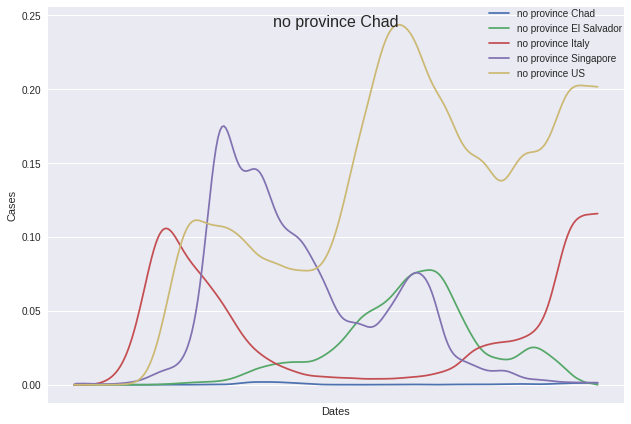

In [ ]:
get_graph(df_confirmed, country=['Italy', 'Singapore', 'US', 'Chad', 'El Salvador'], startc=6)